In [2]:
!ls

Covid19.ipynb
Covid19.xlsx
CovidIndiaAnalysis_Source_covid19india_org.jpeg
Population.xlsx
README.md


In [96]:
x,y = '2020-02-04','2020-04-13'
(datetime.strptime(x,'%Y-%m-%d')-datetime.strptime(y,'%Y-%m-%d')).days

-69

In [109]:
from datetime import date,datetime
def get_dif(x,y):
    try:
        return (datetime.strptime(y,'%Y-%m-%d')-datetime.strptime(x,'%Y-%m-%d')).days
    except:
        return -100

In [230]:
import pandas as pd
import seaborn as sns
import math
import numpy as np
from matplotlib import pyplot as plt
data_df = pd.read_excel('Covid19.xlsx',sheetname='Sheet2')
data_df['Updated'] = data_df['Updated On'].apply(lambda x: str(x)[:10])
all_days = list(sorted(data_df['Updated'].unique()))
data_df['Recency'] = data_df['Updated'].apply(lambda x: get_dif(all_days[-1],x))
data_df = data_df[data_df['Total Tested']*data_df['Positive']>=0].sort_values(['State','Updated'])
data_df = data_df[['Updated On','Recency','State', 'Total Tested', 'Positive']]
population_df = pd.read_excel('Population.xlsx').rename(columns={'State or union territory':'State','Population (2020 estimates)':'Population'})
chart_df = data_df.merge(population_df,on='State',how='left')
chart_df['Total Tested (log)'] = chart_df['Total Tested'].apply(lambda x: math.log(x,10))
chart_df['Population (log)'] = chart_df['Population'].apply(lambda x: math.log(x,10))

In [231]:
chart_df['test_rate'] = chart_df.apply(lambda x: 1000*x['Total Tested']/x['Population'],axis=1)
chart_df['positive_rate'] = chart_df.apply(lambda x: 15000*x['Positive']/x['Total Tested'],axis=1)
chart_df.drop_duplicates('State')

,Updated On,Recency,State,Total Tested,Positive,Population,Total Tested (log),Population (log),test_rate,positive_rate
0,2020-04-17,-2,Andaman and Nicobar Islands,1403.0,12.0,379944,3.147058,5.579720,3.692649,128.296507
1,2020-04-02,-17,Andhra Pradesh,1800.0,132.0,53206421,3.255273,7.725964,0.033831,1100.000000
10,2020-04-09,-10,Arunachal Pradesh,206.0,1.0,1382611,2.313867,6.140700,0.148993,72.815534
14,2020-04-02,-17,Assam,962.0,16.0,31169272,2.983175,7.493727,0.030864,249.480249
23,2020-04-05,-14,Bihar,3037.0,32.0,126750326,3.482445,8.102949,0.023960,158.050708
36,2020-04-02,-17,Chandigarh,124.0,18.0,1545116,2.093422,6.188961,0.080253,2177.419355
47,2020-04-02,-17,Chhattisgarh,1232.0,9.0,25540196,3.090611,7.407224,0.048238,109.577922
56,2020-04-07,-12,Delhi,9041.0,576.0,20188648,3.956216,7.305107,0.447826,955.646499
67,2020-04-02,-17,Goa,220.0,5.0,1457723,2.342423,6.163675,0.150920,340.909091
77,2020-04-08,-11,Gujarat,4224.0,186.0,71521926,3.625724,7.854439,0.059059,660.511364


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


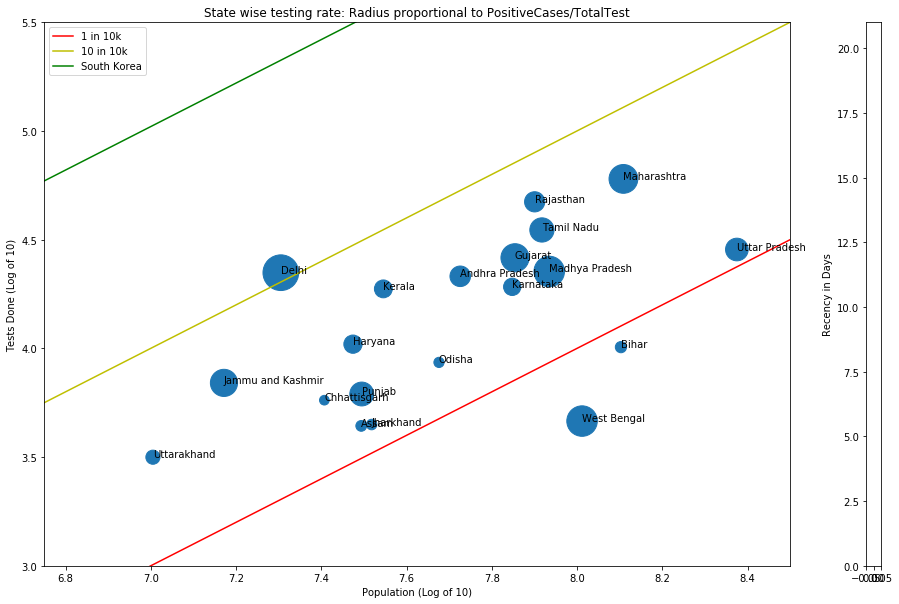

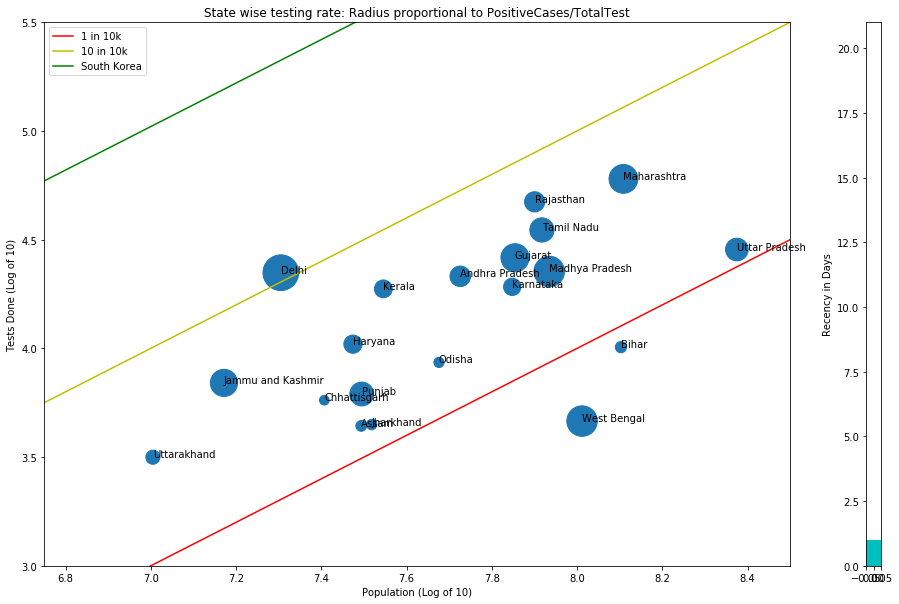

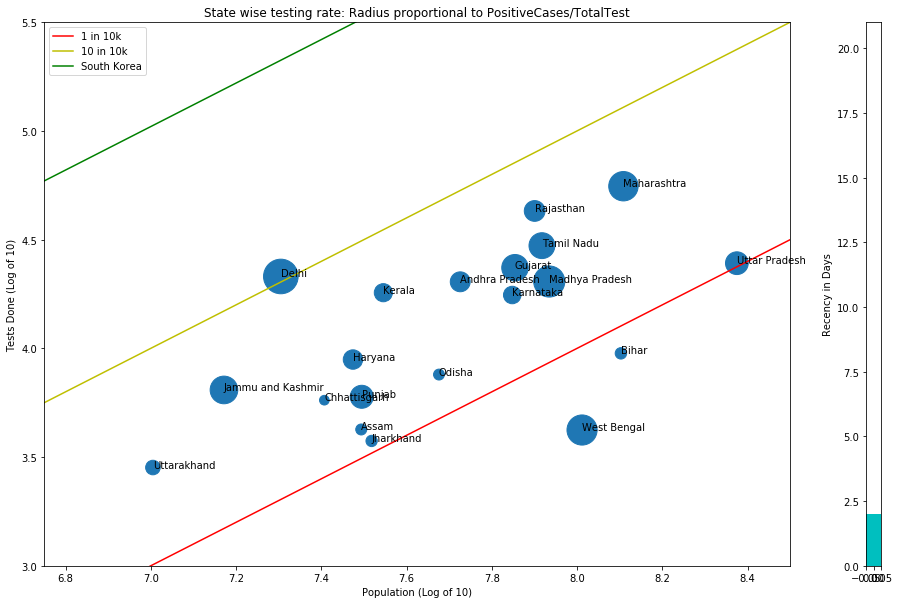

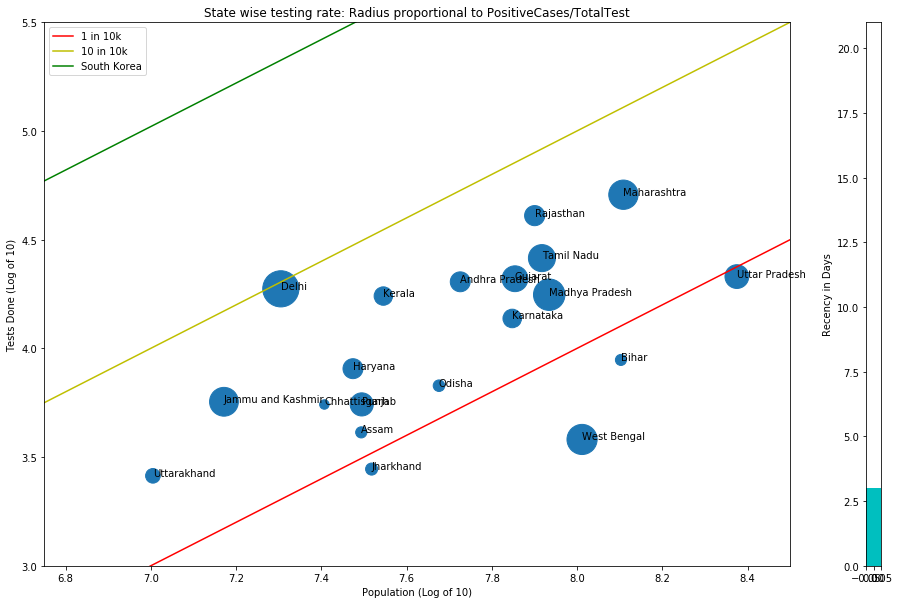

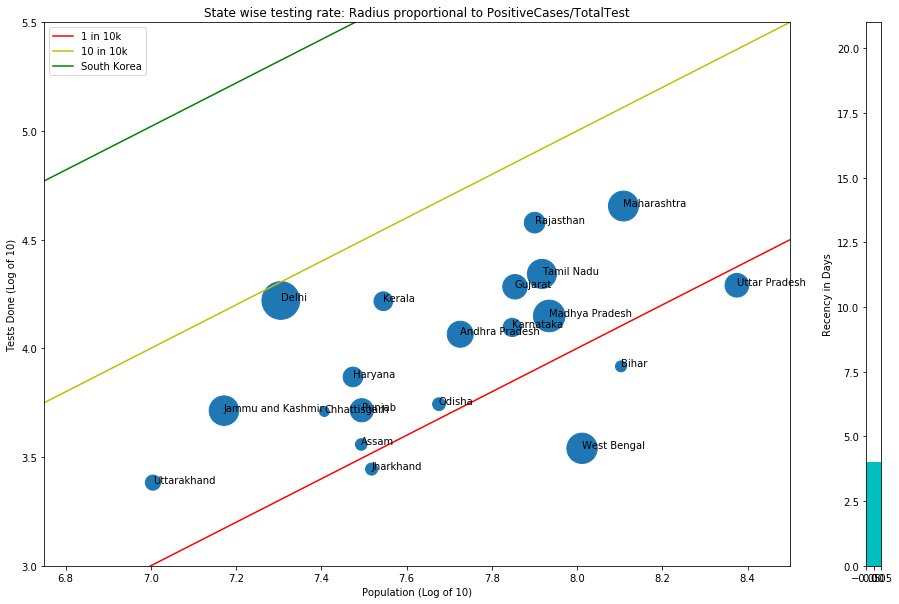

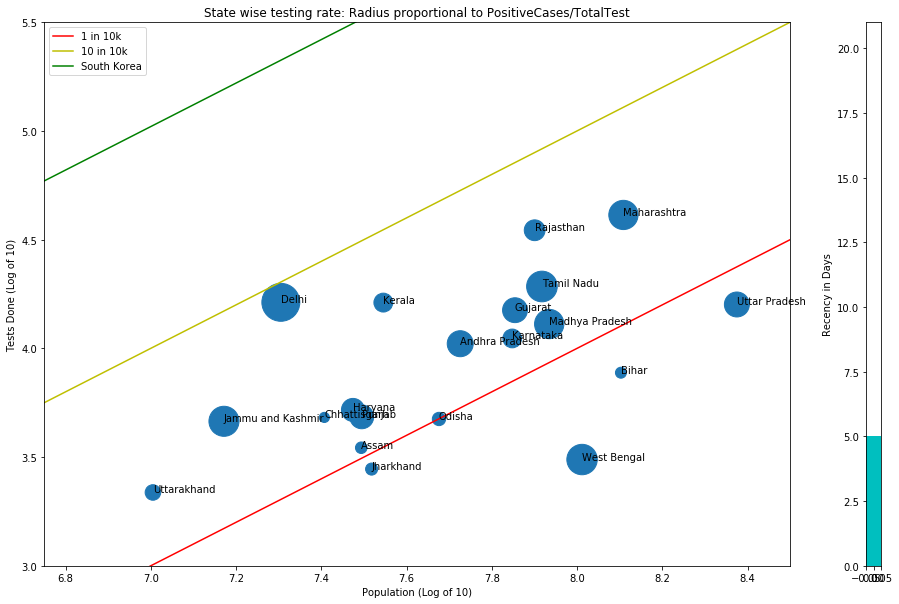

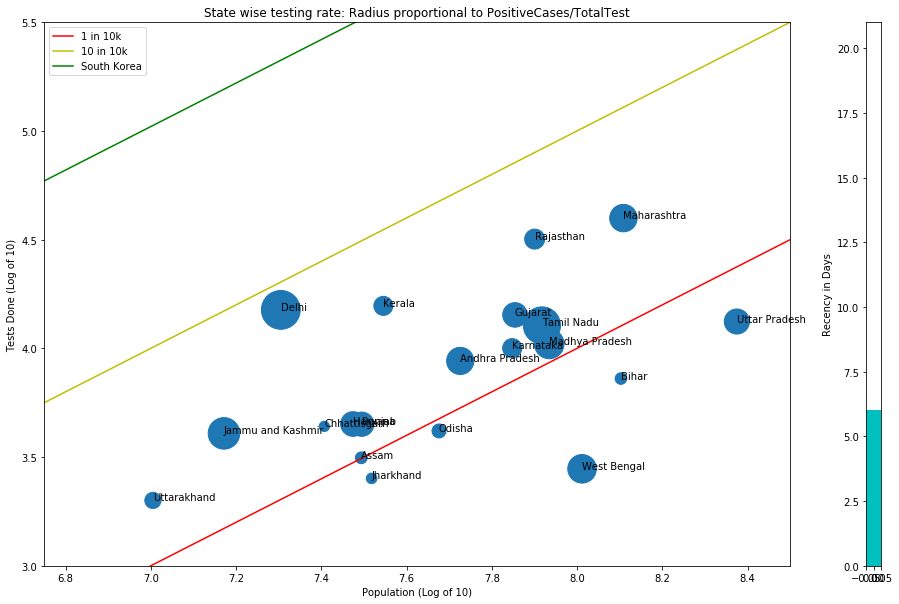

In [ ]:
di=0
for di in range(len(all_days)):
    chart_df1 = chart_df[chart_df.Population>=8000000][chart_df['Recency']<=di*(-1)].drop_duplicates('State',keep='last')

    f, (ax, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [50, 1]},figsize=(15,10))
    y = chart_df1['Total Tested (log)'].values
    x = chart_df1["Population (log)"].values
    n = chart_df1['State'].values
    s = chart_df1['positive_rate'].values
    ax.scatter(x, y,s=s)
    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]))
    ax.set_xlim([6.75,8.5])
    ax.set_ylim([3,5.5])
    x_min, x_max = ax.get_xlim()
    y_min, y_max = x_min-4, x_max-4
    ax.plot([x_min, x_max], [y_min, y_max],c='r', label='1 in 10k')
    y_min, y_max = x_min-3, x_max-3
    ax.plot([x_min, x_max], [y_min, y_max],c='y', label='10 in 10k')
    y_min, y_max = x_min-1.98, x_max-1.98
    ax.plot([x_min, x_max], [y_min, y_max],c='g', label='South Korea')
    ax.legend()
    ax.set_xlabel('Population (Log of 10)')
    ax.set_ylabel('Tests Done (Log of 10)')
    a1.bar([0],[di],color=['c'])
    a1.set_xlim([0,0])
    a1.set_ylim([0, len(all_days)])
    a1.set_ylabel('Recency in Days')
    ax.set_title('State wise testing rate: Radius proportional to PositiveCases/TotalTest')
    plt.savefig('CovidIndiaAnalysis_Source_covid19india_org'+str(di)+'.jpeg')

In [ ]:
import imageio
images = []
filenames = ['CovidIndiaAnalysis_Source_covid19india_org'+str(di)+'.jpeg' for di in range(len(all_days))]
for filename in filenames[::-1]:
    images.append(imageio.imread(filename))
imageio.mimsave('covidlog.gif', images,fps=0.5)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


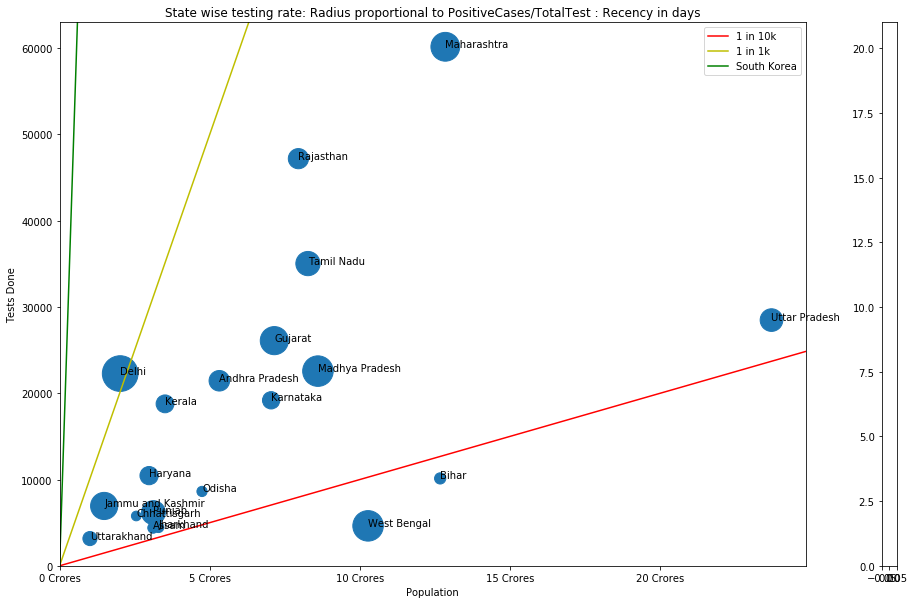

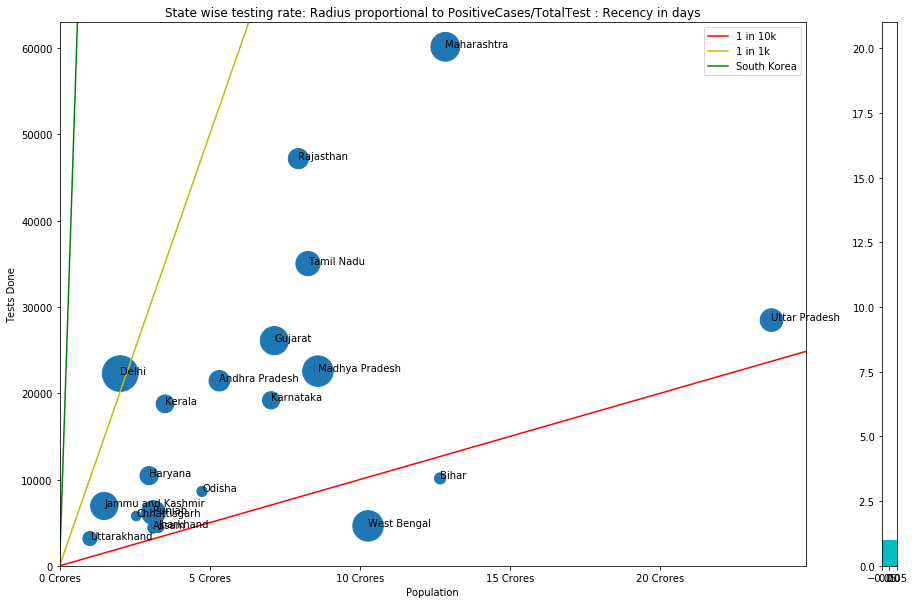

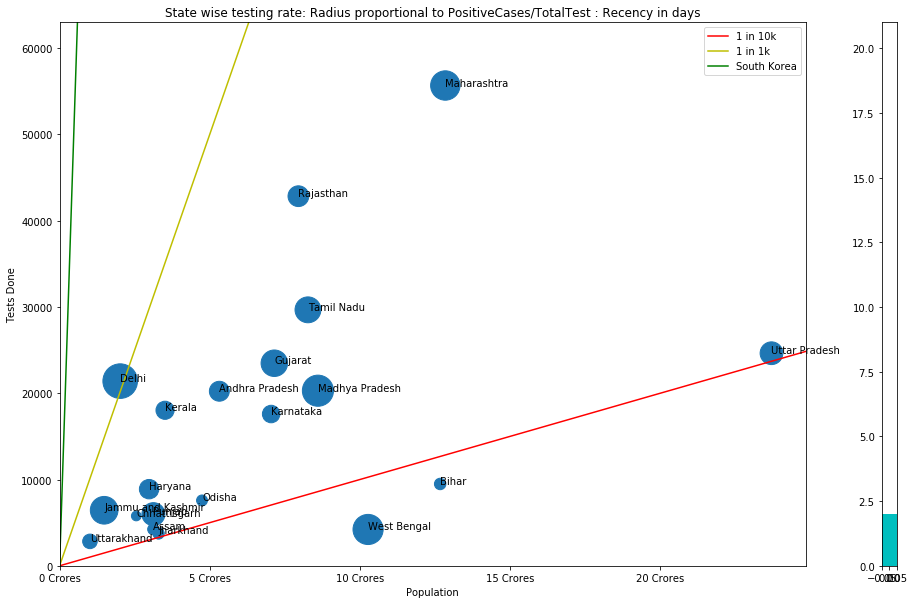

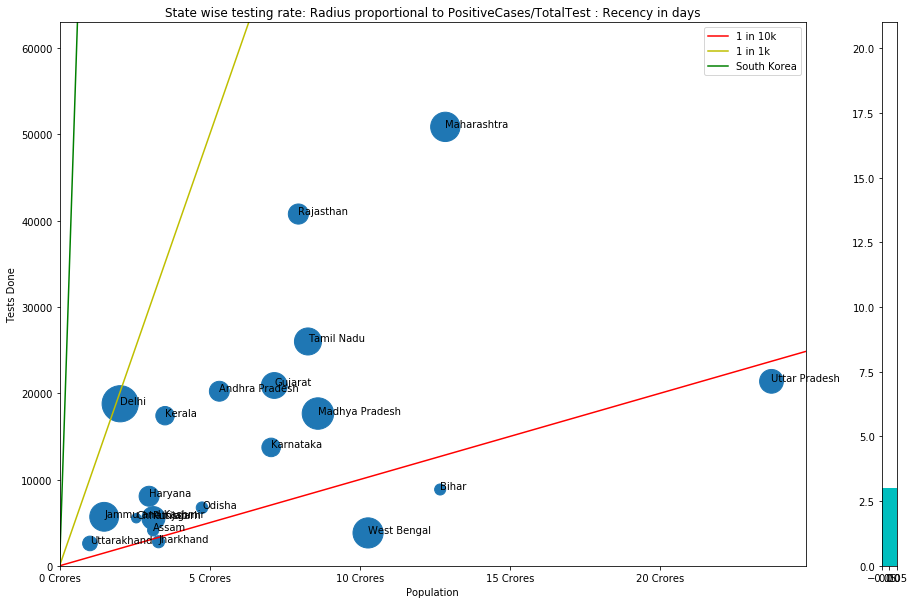

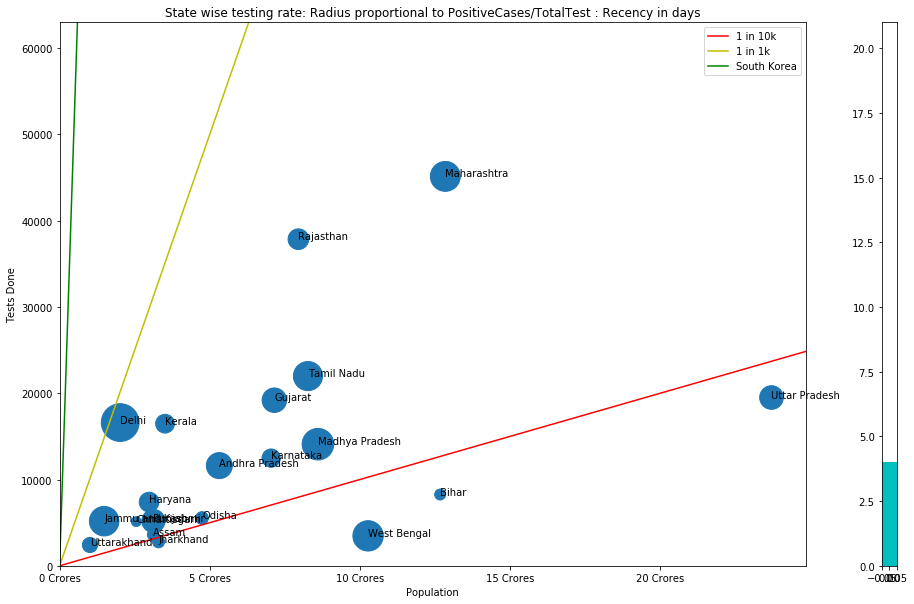

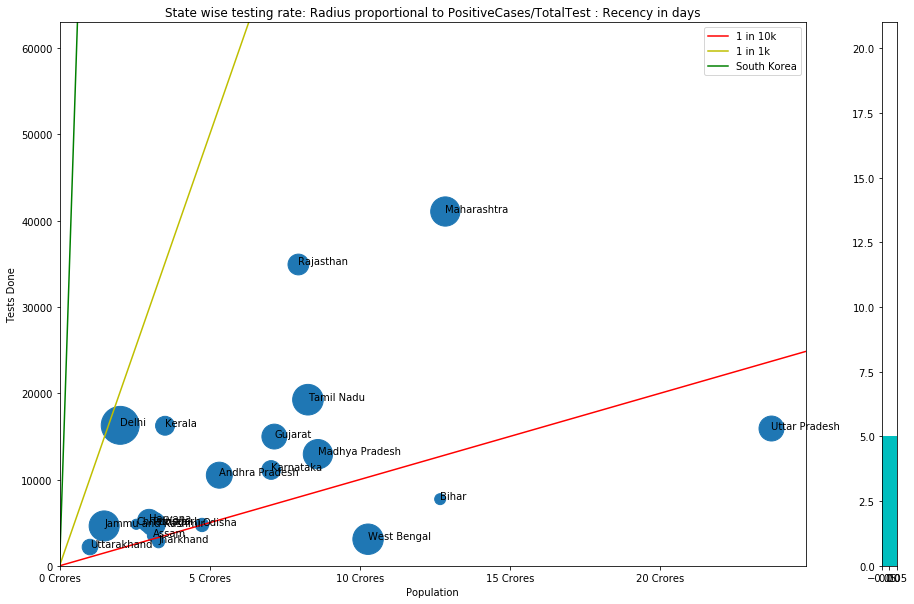

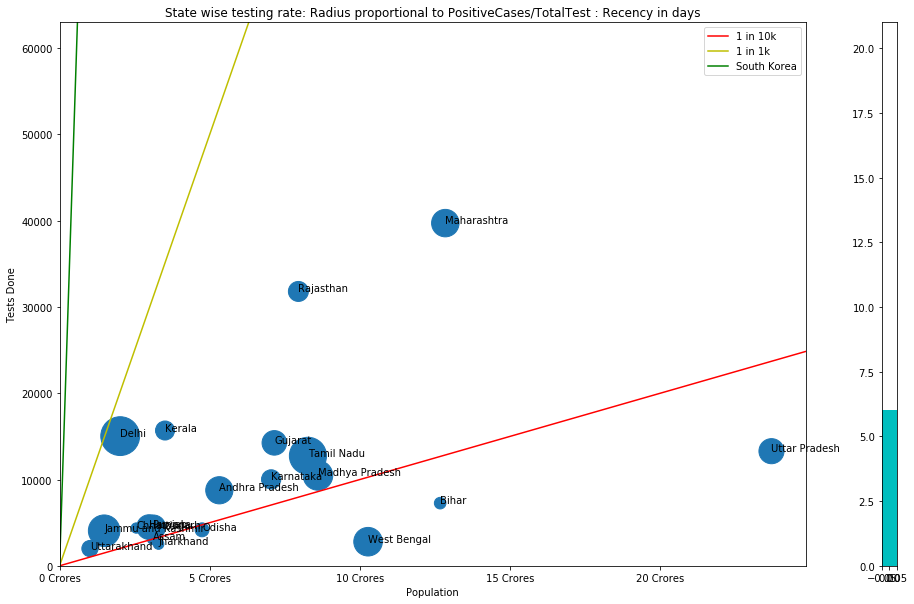

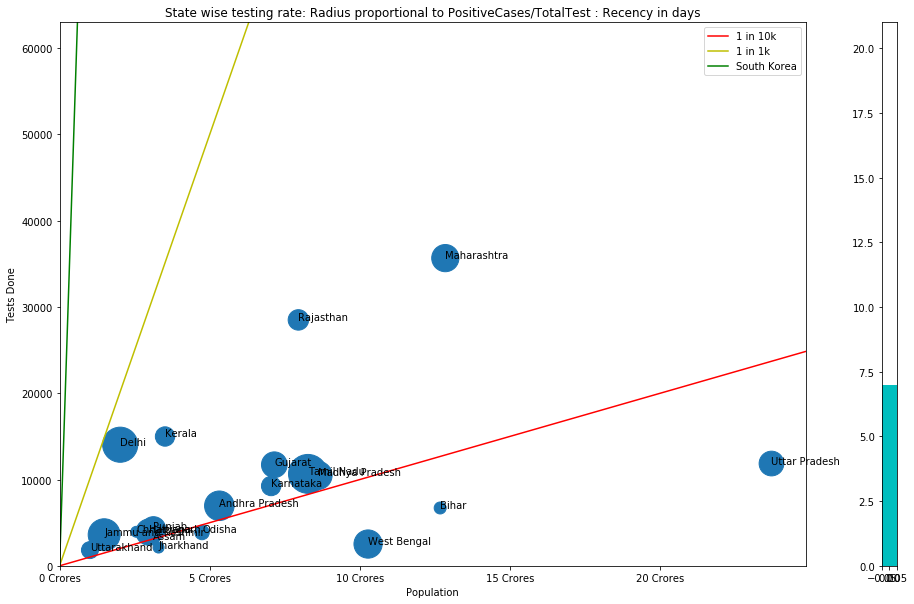

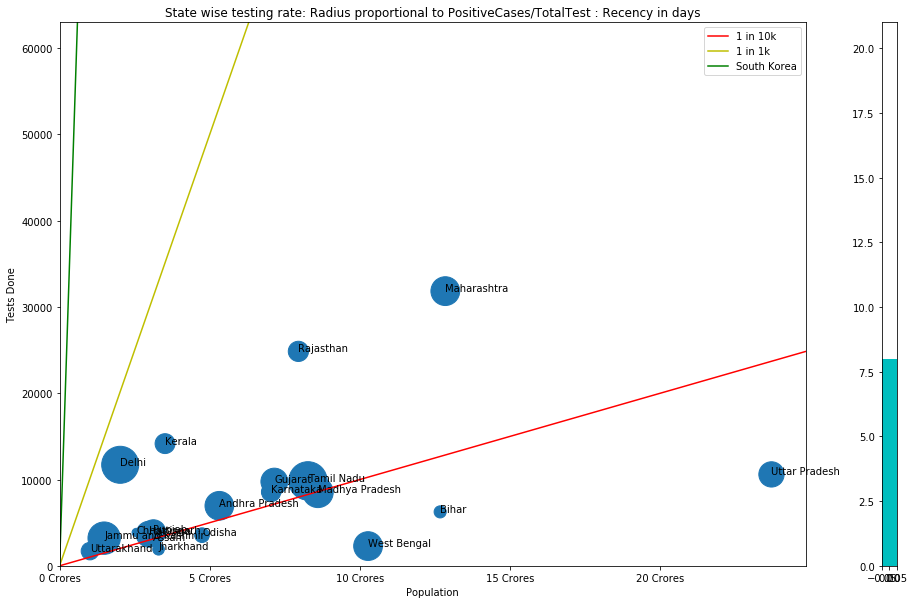

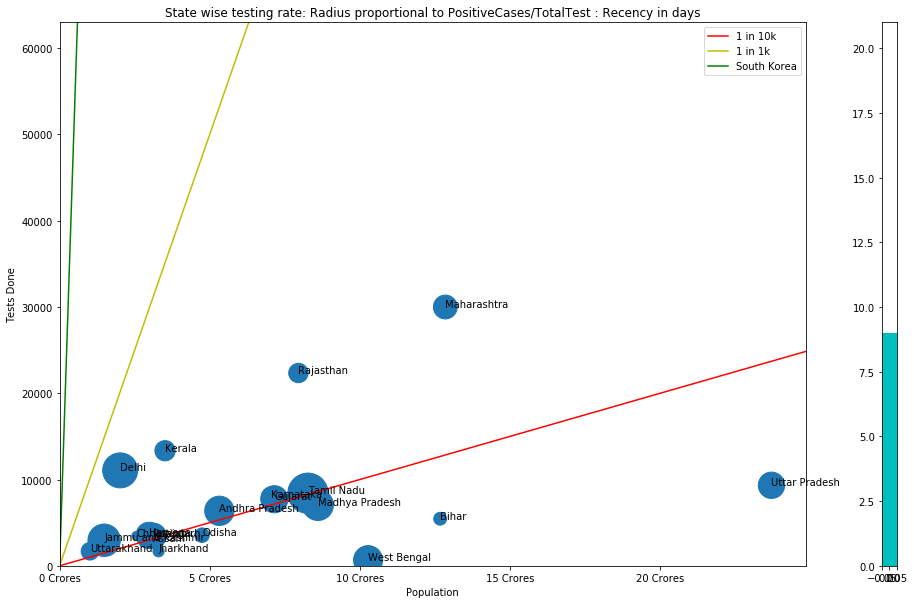

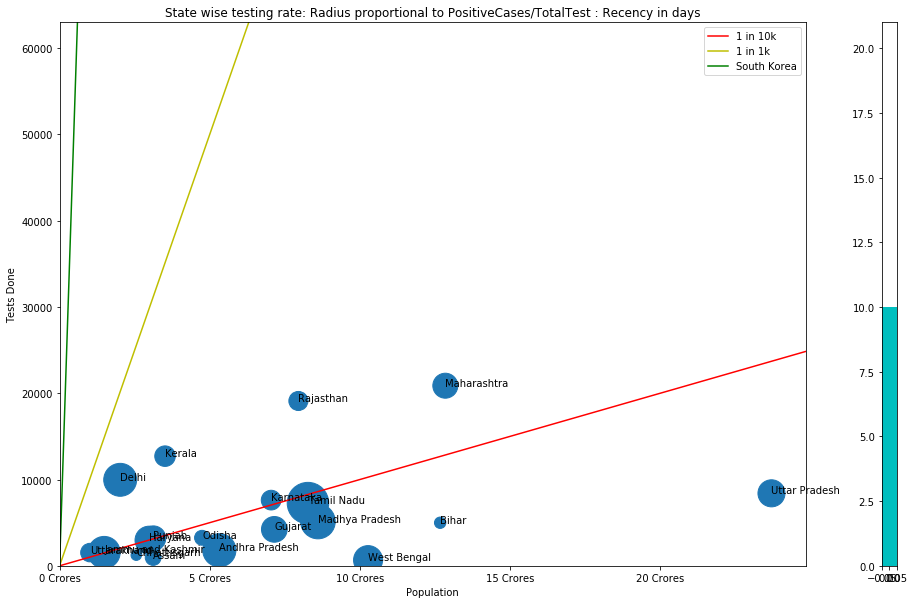

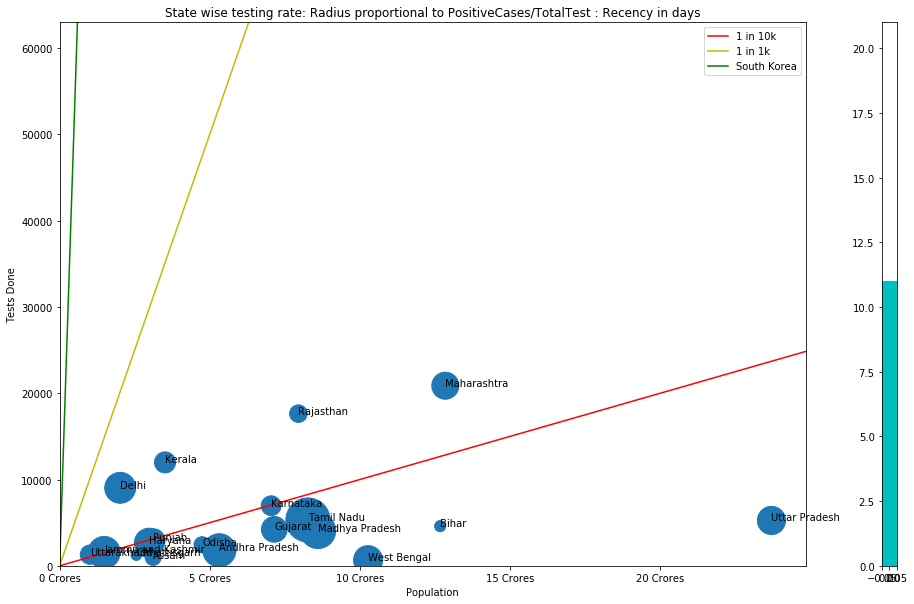

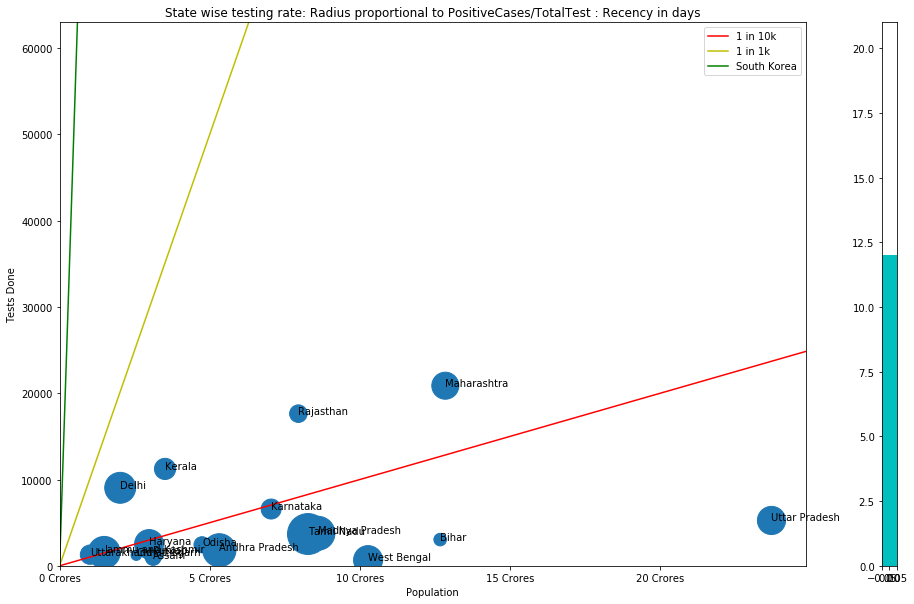

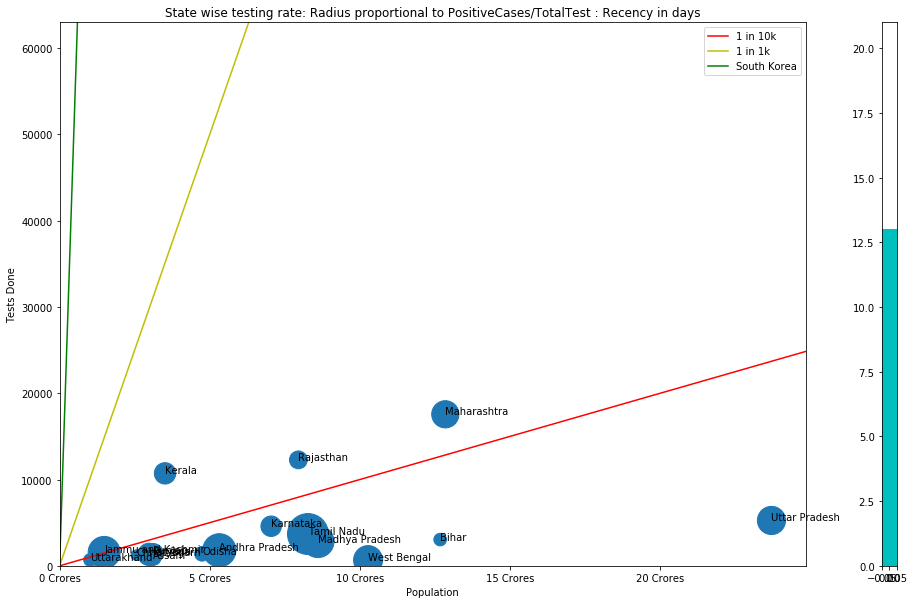

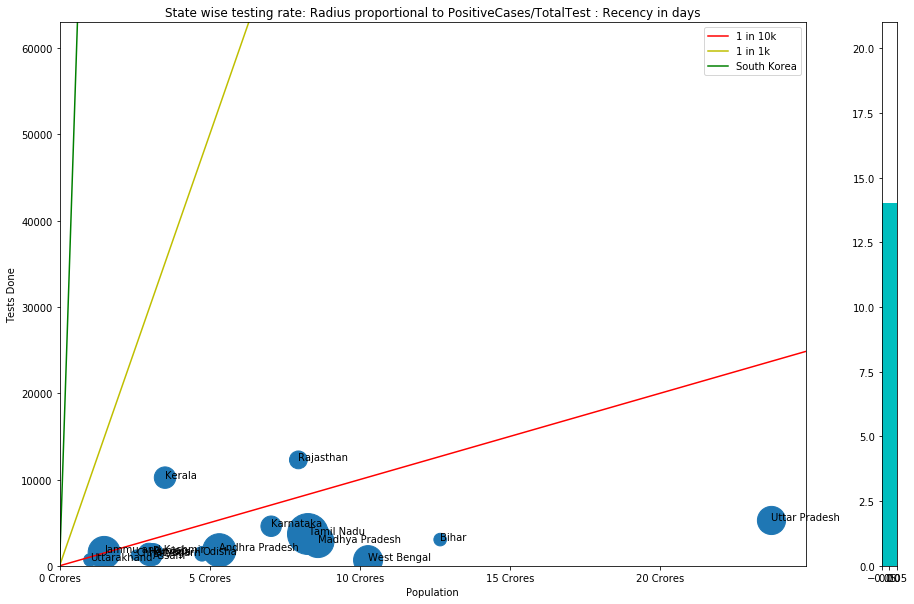

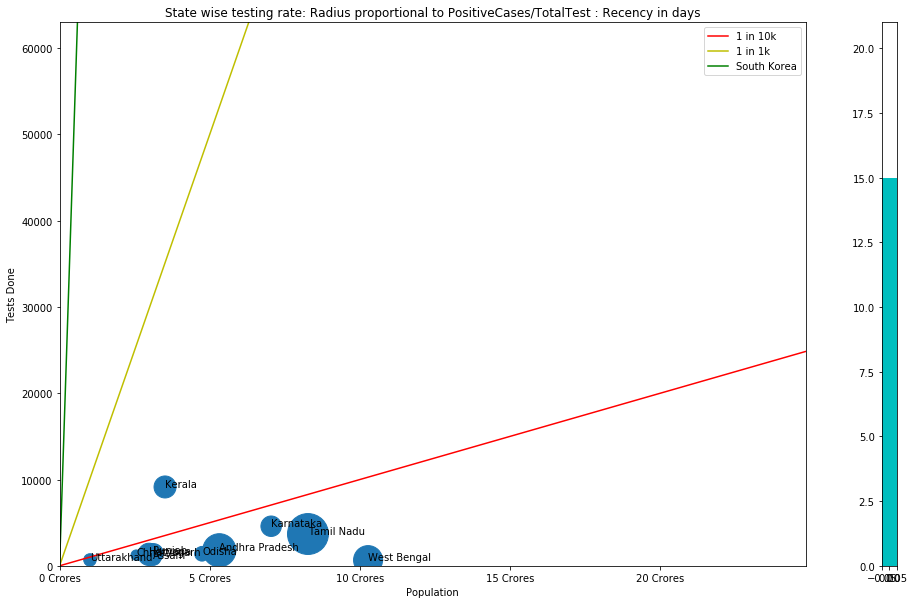

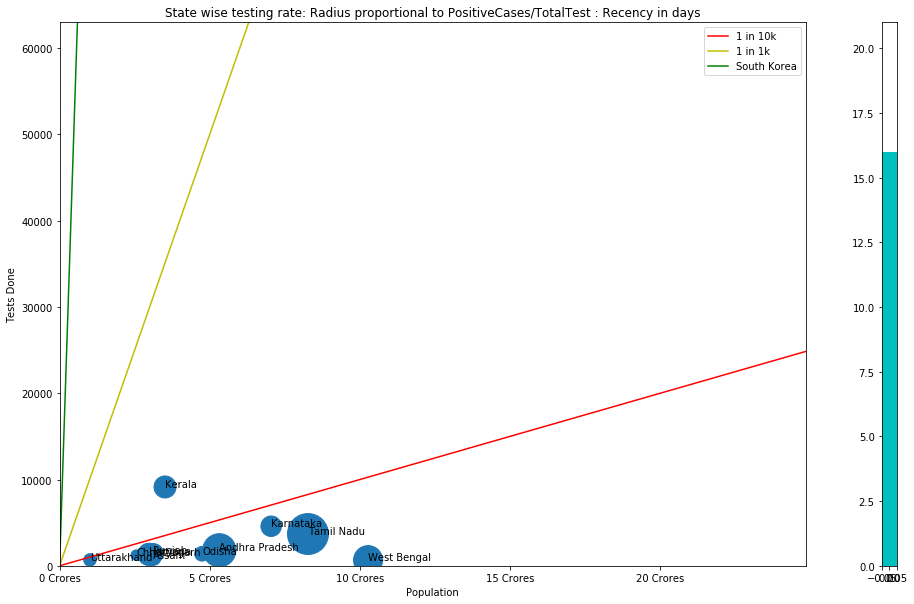

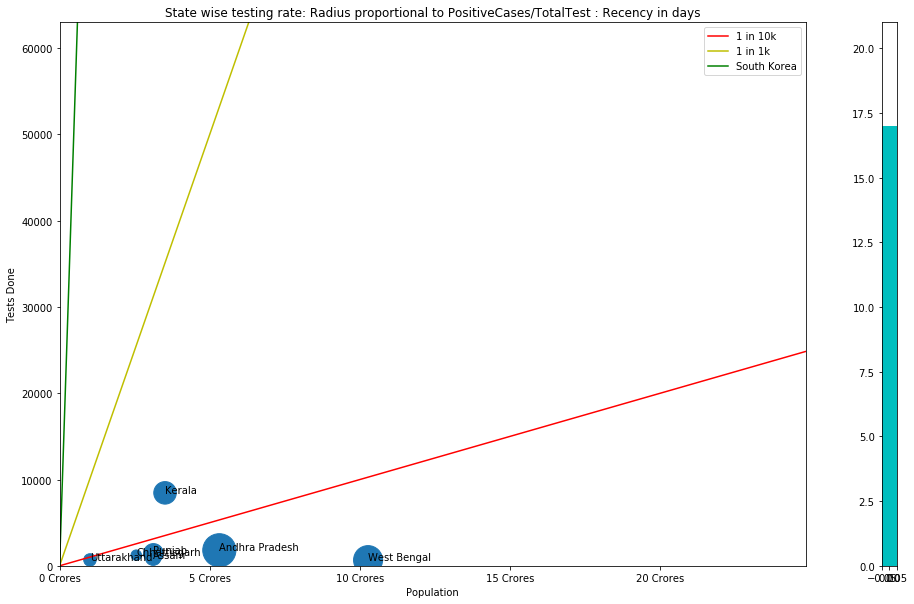

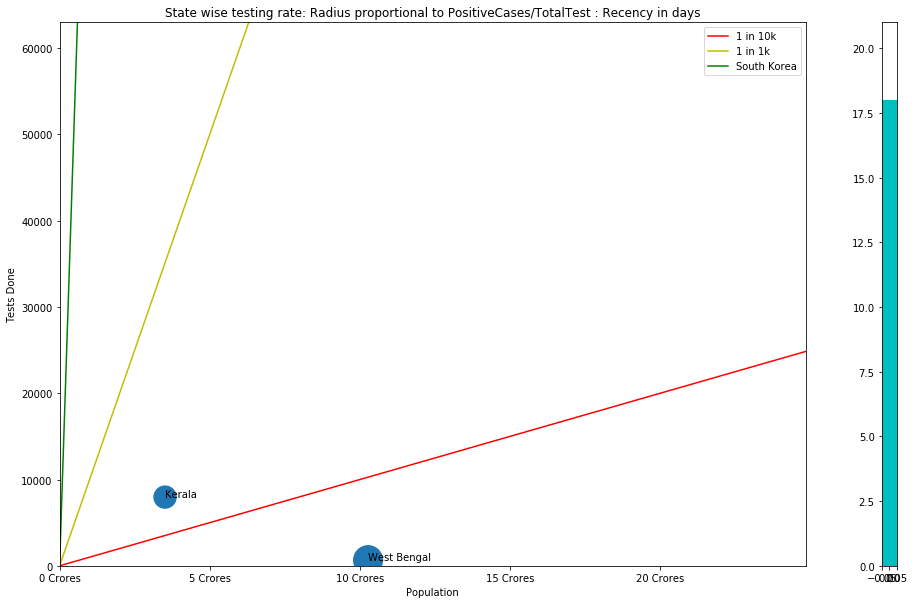

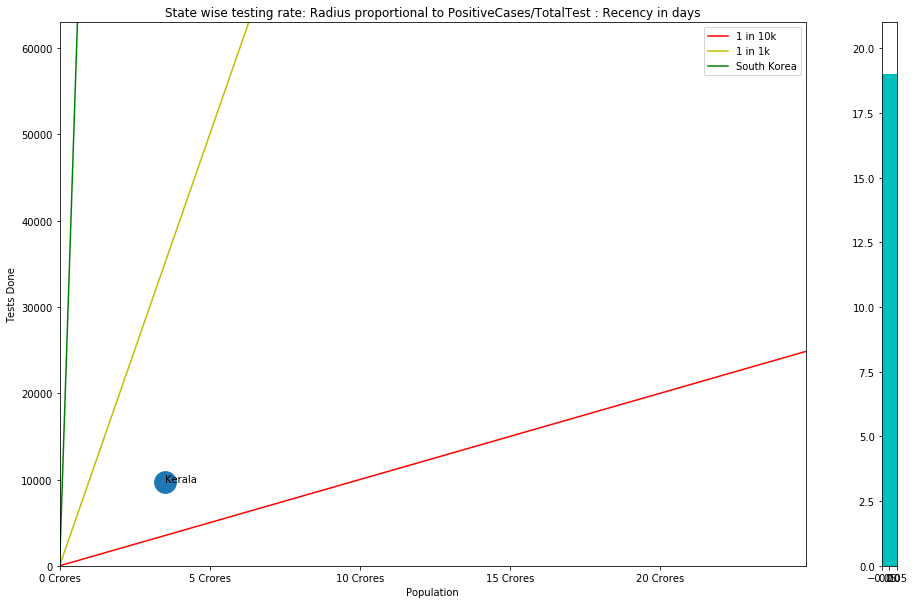

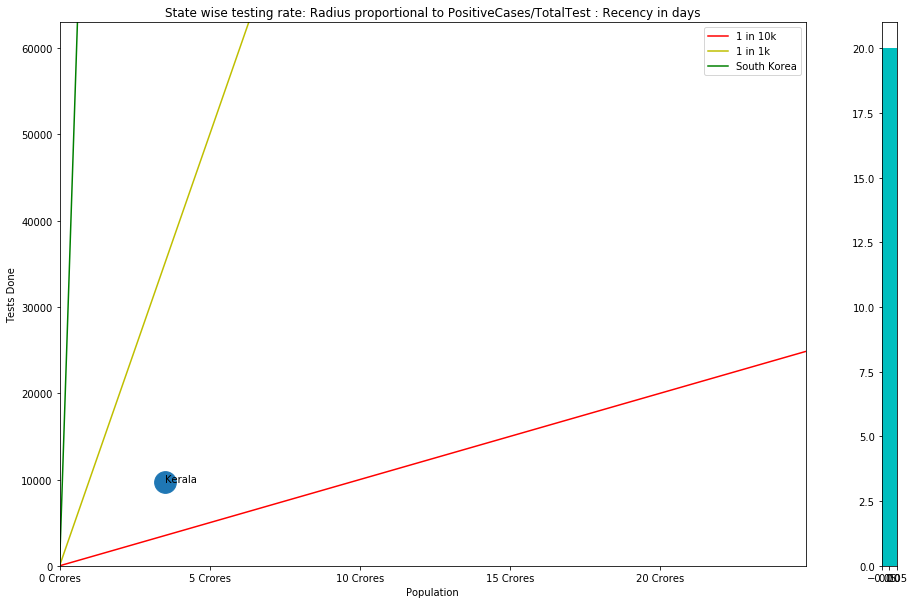

In [254]:
di = 20
x_m_g = 0
y_m_g = 0
for di in range(len(all_days)):

    chart_df1 = chart_df[chart_df.Population>=8000000][chart_df['Recency']<=di*(-1)].drop_duplicates('State',keep='last')

    f, (ax, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [50, 1]},figsize=(15,10))
    y = chart_df1['Total Tested'].values
    x = chart_df1["Population"].values
    n = chart_df1['State'].values
    s = chart_df1['positive_rate'].values
    # ax,a1
    # ax = plt.gca()

    # fig, ax = plt.subplots()
    ax.scatter(x, y,s=s)
    x_m, y_m = ax.get_xlim()[1],ax.get_ylim()[1]
    if x_m > x_m_g:
        x_m_g = x_m
    if y_m > y_m_g:
        y_m_g = y_m
    ax.set_xlim([0,248443937])
    ax.set_ylim([0,63016])

    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]))

    slope = 1/10000
    c = 0

    x_min, x_max = ax.get_xlim()
    y_min, y_max = x_min*slope, x_max*slope
    ax.plot([x_min, x_max], [y_min, y_max],c='r', label='1 in 10k')
    ax.set_xlim([0, x_max])

    slope = 10/10000
    c = 0

    y_min, y_max = ax.get_ylim()
    x_min, x_max = y_min/slope, y_max/slope
    ax.plot([x_min, x_max], [y_min, y_max],c='y', label='1 in 1k')
    ax.set_ylim([0, y_max])

    slope = 546463/51600000
    c = 0

    y_min, y_max = ax.get_ylim()
    x_min, x_max = y_min/slope, y_max/slope
    ax.plot([x_min, x_max], [y_min, y_max],c='g', label='South Korea')
    ax.set_ylim([0, y_max])
    ax.legend()
    from matplotlib.ticker import FuncFormatter
    f = lambda x, pos: f'{x/10**7:,.0f} Crores'
    ax.xaxis.set_major_formatter(FuncFormatter(f))
    ax.set_xlabel('Population')
    ax.set_ylabel('Tests Done')
    a1.bar([0],[di],color=['c'])
    a1.set_xlim([0,0])
    a1.set_ylim([0, len(all_days)])
    ax.set_title('State wise testing rate: Radius proportional to PositiveCases/TotalTest')
    plt.savefig('CovidIndiaAnalysis_Source_covid19india_org'+str(di)+'.jpeg')

In [255]:
from PIL import Image
im = Image.open('covid.gif')

In [206]:
import imageio
images = []
filenames = ['CovidIndiaAnalysis_Source_covid19india_org'+str(di)+'.jpeg' for di in range(len(all_days))]
for filename in filenames[::-1]:
    images.append(imageio.imread(filename))
imageio.mimsave('covid.gif', images,fps=0.5)

<Figure size 360x360 with 0 Axes>

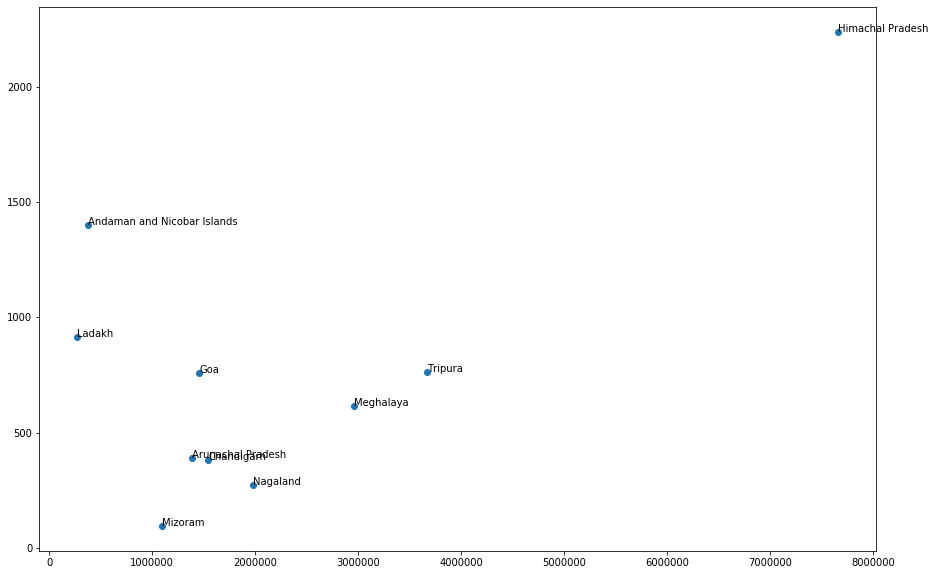

In [77]:
chart_df2 = chart_df[chart_df.Population<=10000000]
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
y = chart_df2['Total Tested'].values
x = chart_df2["Population"].values
n = chart_df2['State'].values

fig, ax = plt.subplots()
plt.scatter(x, y)
plt.gcf().set_size_inches((15, 10))  

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))